<img src="Avenida máxima probable. P.H. Norte II.jpg">

[Fit surface to polynomials in Python](https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6)

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
a = 3.5465
b = 0.208
c = 0.7727
d = -0.0315

In [3]:
def Q_from_TS(T, S, a=3.5465, b=0.208, c=0.7727, d=-0.0315):
    """"""
    
    Q = a * T**b * S**(c + d * np.log10(T))
    
    return Q

In [4]:
# Prueba con un T y una superficie cualquiera
T = 10 # años
S = 1174 # km²

In [5]:
# Aplico la fórmula
Q = Q_from_TS(T, S)
print('Q = {0:.1f} m³/s'.format(Q))

Q = 1079.0 m³/s


In [6]:
def f(T, S=S, Q=Q, a=3.5465, b=0.208, c=0.7727, d=-0.0315):
    return round(a * T**b * S**(c + d * np.log10(T)) - Q, 1)

In [7]:
# Hago la derivada que me servirá para encontrar las raices del polinomio según el metodo de Newton-Raphson
def fprime(T, S=S, Q=Q, a=3.5465, b=0.208, c=0.7727, d=-0.0315):
    return a * b * T**(b-1) * S**(c - d * np.log10(T)) + a * T**b * (d / (np.log(10) * T)) * S**(c +d * np.log10(T) - 1)

In [8]:
# calcular retorno por el método de Brent
Tbrent = optimize.root_scalar(f, bracket=[0.001, 2000], method='brentq').root

In [9]:
# calcular retorno por el método de Newton
Tnewton = optimize.root_scalar(f, x0=10, fprime=fprime, method='newton').root

In [10]:
# Compruebo que el periodo de retorno es el mismo que el que definí al principio. La  solución del polinomio es correcta
print('Brent:\tT = {0:.1f} años'.format(Tbrent))
print('Newton:\tT = {0:.1f} años'.format(Tnewton))

Brent:	T = 10.0 años
Newton:	T = 10.0 años


In [11]:
T = 10

In [12]:
# He creado 50 numeros en espacio logaritmico
# stop in np.logspace(start, stop, num=50) is the final value of the sequence. Number of samples to generate. Default is 50.
Ss = np.logspace(0, 4, num=50)
# Sz=np.random.multivariate_normal(mean, cov, 50)

# Periodos de retorno
Ts = [5, 10, 25, 50, 1000]

Qs = pd.DataFrame(index=Ss, columns=Ts)
for T in Qs.columns:
    Qs[T] = np.array([Q_from_TS(T, S) / S for S in Ss])

In [13]:
Ss

array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+01, 3.55648031e+01,
       4.29193426e+01, 5.17947468e+01, 6.25055193e+01, 7.54312006e+01,
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])

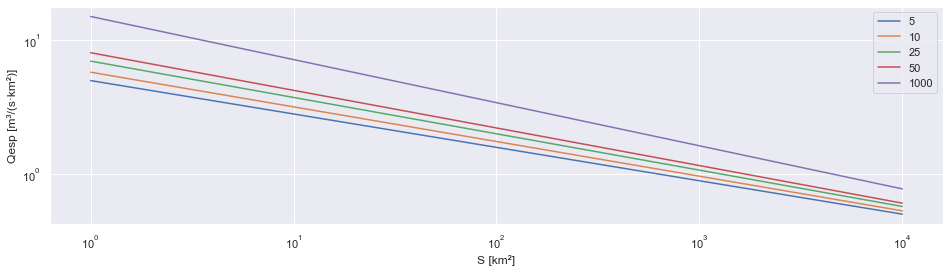

In [14]:
plt.figure(figsize=(16, 4))

for T in Qs.columns:
    plt.plot(Ss, Qs[T], label=T)

yticks = np.linspace(0, 10, 11)
plt.yticks(ticks=yticks, labels=yticks)
plt.xlabel('S [km²]')
plt.ylabel('Qesp [m³/(s·km²)]')
plt.yscale('log')
plt.xscale('log')
plt.legend();

# Parte II

In [22]:
# importo el ábaco del excel
abaco = pd.read_excel('abaco.xlsx', sheet_name='abaco', index_col='S')

In [24]:
abaco

,Q5,Q10,Q25,Q50,Q100,Q500
S,,,,,,
100,1.60000,1.719998,1.950000,2.200000,4.00000,6.26999
200,1.59407,1.713566,1.942563,2.191558,3.98392,6.24438
300,1.58814,1.707134,1.935126,2.183116,3.96784,6.21877
400,1.58221,1.700702,1.927689,2.174674,3.95176,6.19316
500,1.57628,1.694270,1.920252,2.166232,3.93568,6.16755
...,...,...,...,...,...,...
19600,0.44365,0.465758,0.499785,0.553810,0.86440,1.27604
19700,0.43772,0.459326,0.492348,0.545368,0.84832,1.25043
19800,0.43179,0.452894,0.484911,0.536926,0.83224,1.22482


In [25]:
abaco.columns

Index(['Q5', 'Q10', 'Q25', 'Q50', 'Q100', 'Q500'], dtype='object')

In [26]:
abaco.index

Int64Index([  100,   200,   300,   400,   500,   600,   700,   800,   900,
             1000,
            ...
            19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800, 19900,
            20000],
           dtype='int64', name='S', length=200)

In [29]:
# ajustar polinomio para un periodo de retorno 
# numpy.polyfit(x, y, deg).Returns a vector of coefficients p that minimises the squared error in the order deg
pars = np.polyfit(np.log10(abaco.index), np.log10(abaco.Q10), deg=3)


In [30]:
pars

array([-0.25931859,  2.31029345, -6.76078834,  6.6902066 ])

In [31]:
print('La ecuación queda de la siguiente manera: log Qs = {0:.3f} (log S)³ + {1:.3f} (log S)² + {2:.3f} log S + {3:.3f}'.format(*pars))

La ecuación queda de la siguiente manera: log Qs = -0.259 (log S)³ + 2.310 (log S)² + -6.761 log S + 6.690


In [32]:
# calcular puntos de la curva ajustada

# He creado 50 numeros en espacio logaritmico
S_ = np.logspace(0, 5, 50)
# np.polyval(pars, x). If x is a sequence, then p(x) is returned for each element of x.
Q_ = 10**np.polyval(pars, np.log10(S_))


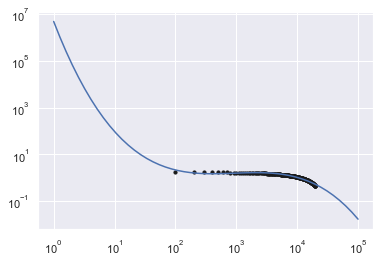

In [33]:
# gráfico
plt.scatter(abaco.index, abaco.Q10, s=10, c='k', label='abaco')
plt.plot(S_, Q_)

plt.xscale('log')
plt.yscale('log')

***

# Parte III: A partir de una distribucion normal

In [34]:
# https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6

In [35]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [36]:
# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
datos = np.random.multivariate_normal(mean, cov, 60)

In [37]:
datos


array([[ 1.97977988, -2.87380054,  1.25414774],
       [-0.35649451, -0.98993398, -0.88494951],
       [ 0.01275678, -0.69072222, -0.0803602 ],
       [-0.53366331,  2.22674973,  0.78671936],
       [-0.34751623, -0.01300597, -0.19286988],
       [-0.42539528,  0.06165168, -0.84025995],
       [-0.5186566 , -1.47214007, -1.40497282],
       [ 0.34321598, -0.10160916,  0.48754746],
       [ 1.04644836, -0.88733467,  0.86063972],
       [-2.15926094, -1.30452514, -2.90392743],
       [ 0.55939439,  0.39085287,  0.97116095],
       [ 0.75114302, -0.8103361 , -0.53490118],
       [ 2.72341126, -2.02112647,  1.92441783],
       [ 0.55274693, -0.61512837,  0.61705798],
       [ 0.65790177,  1.25279882,  2.04763827],
       [ 0.73430962, -1.16936526,  0.60783735],
       [-0.29671459,  1.86783034,  1.11343232],
       [ 1.86542221, -0.59172171,  1.72464288],
       [-1.31508499,  0.69102186, -1.17366277],
       [ 1.54710777, -1.23229155,  0.51780101],
       [-1.93426245,  0.70968622, -1.267

In [38]:
datos.shape

(60, 3)

In [39]:
# regular grid covering the domain of the data
XX,YY = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
X = XX.flatten()
Y = YY.flatten()

In [40]:
order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane: Z = a·X + b·Y + c
    A = np.c_[datos[:,0], datos[:,1], np.ones(datos.shape[0])]
    pars, residues, rank, s = scipy.linalg.lstsq(A, datos[:,2])    # coefficients
    
    # evaluate it on grid
    a, b, c = pars
    ZZ = a * XX + b * YY + c
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²
    A = np.c_[np.ones(datos.shape[0]), datos[:,:2], np.prod(datos[:,:2], axis=1), datos[:,:2]**2]
    pars, residues, rank, s = scipy.linalg.lstsq(A, datos[:,2])
    
    # evaluate it on a grid
    a, b, c, d, e, f = pars
    ZZ = np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], pars).reshape(XX.shape)

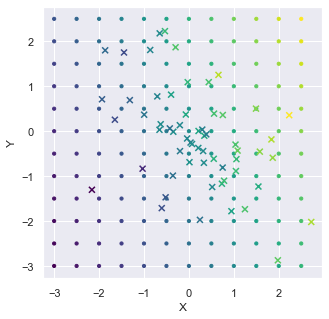

In [41]:
plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s=10, c=ZZ, cmap='viridis')
plt.scatter(datos[:,0], datos[:,1], marker='x', c=datos[:,2], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal');

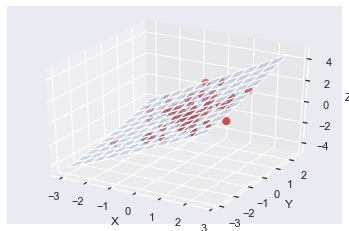

In [42]:
# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, alpha=0.2)
ax.scatter(datos[:,0], datos[:,1], datos[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
# ax.axis('equal')
ax.axis('tight')
plt.show()

In [43]:
pars

array([-0.0704332 ,  1.12444376,  0.49621947,  0.02194464,  0.0166185 ,
        0.03219448])

 # parte IV: A partir de una malla regular con los datos del ábaco

In [44]:
abaco.shape

(200, 6)

In [45]:
abaco

,Q5,Q10,Q25,Q50,Q100,Q500
S,,,,,,
100,1.60000,1.719998,1.950000,2.200000,4.00000,6.26999
200,1.59407,1.713566,1.942563,2.191558,3.98392,6.24438
300,1.58814,1.707134,1.935126,2.183116,3.96784,6.21877
400,1.58221,1.700702,1.927689,2.174674,3.95176,6.19316
500,1.57628,1.694270,1.920252,2.166232,3.93568,6.16755
...,...,...,...,...,...,...
19600,0.44365,0.465758,0.499785,0.553810,0.86440,1.27604
19700,0.43772,0.459326,0.492348,0.545368,0.84832,1.25043
19800,0.43179,0.452894,0.484911,0.536926,0.83224,1.22482


In [47]:
data = pd.DataFrame(index=np.arange(abaco.shape[0] * abaco.shape[1]), columns=['S', 'Perido  retorno', 'Q'])
data.iloc[0,:] = [100, 5, 1.60]

In [48]:
data.head(2)

,S,Perido retorno,Q
0,100,5,1.6
1,NaN,NaN,NaN


In [49]:
data.shape

(1200, 3)

In [50]:
data= []
for col in abaco.columns:
    for index in abaco.index:
        data.append([np.log10(index), np.log10(int(col[1:])), np.log10(abaco[col].loc[index])]) 
data  = np.array(data)  

In [61]:
data

array([[2.        , 0.69897   , 0.20411998],
       [2.30103   , 0.69897   , 0.20250739],
       [2.47712125, 0.69897   , 0.20088878],
       ...,
       [4.29666519, 2.69897   , 0.08807227],
       [4.29885308, 2.69897   , 0.07889524],
       [4.30103   , 2.69897   , 0.0695201 ]])

In [51]:
# datanew.shape
# Una lista no tiene shape

In [52]:
data.shape

(1200, 3)

In [53]:
data[:,1].min(), data[:,1].max()

(0.6989700043360189, 2.6989700043360187)

In [55]:
# regular grid covering the domain of the data
XX,YY = np.meshgrid(np.arange(np.log10(10), np.log10(50000), .1), np.array(np.log10([5, 10, 25, 50, 100, 500])))
X = XX.flatten()
Y = YY.flatten()

In [56]:
order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane: Z = a·X + b·Y + c
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    a, b, c = pars
    ZZ = a * XX + b * YY + c
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    pars, residues, rank, s = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    a, b, c, d, e, f = pars
    ZZ = np.dot(np.c_[np.ones(X.shape), X, Y, X*Y, X**2, Y**2], pars).reshape(XX.shape)

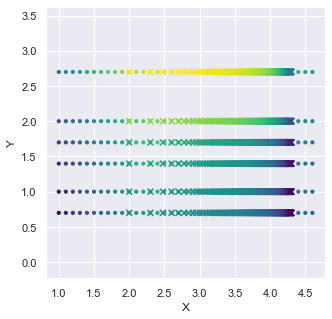

In [57]:
plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s=10, c=ZZ, cmap='viridis')
plt.scatter(data[:,0], data[:,1], marker='x', c=data[:,2], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal');

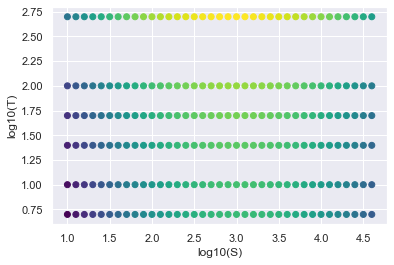

In [62]:
plt.scatter(XX.flatten(), YY.flatten(), c=ZZ.flatten(), cmap='viridis')
plt.xlabel('log10(S)')
plt.ylabel('log10(T)');

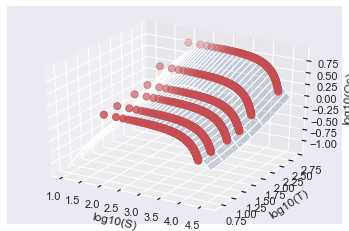

In [63]:
# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('log10(S)')
plt.ylabel('log10(T)')
ax.set_zlabel('log10(Qs)')
# ax.axis('equal')
ax.axis('tight')
plt.show()

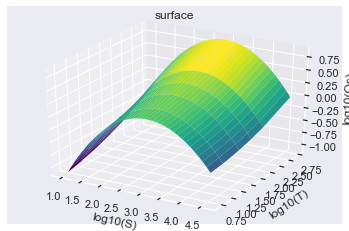

In [64]:
ax = plt.axes(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.xlabel('log10(S)')
plt.ylabel('log10(T)')
ax.set_zlabel('log10(Qs)')
ax.set_title('surface');

In [65]:
Pars = pd.Series(pars, index=['a', 'b', 'c', 'd','e','f'])

Pars.to_csv('Parámetros_abaco.csv', header=None)

In [66]:
print('La ecuación queda de la siguiente manera: 0 = {0:.3f} + {1:.3f}(log S) + {2:.4f} log T + {3:.4f} (log S) log T+ {4:.4f} (log S)²+{5:.6f} log T² -logQ '.format(*pars))

La ecuación queda de la siguiente manera: 0 = -2.893 + 2.010(log S) + 0.0911 log T + -0.0345 (log S) log T+ -0.3260 (log S)²+0.098766 log T² -logQ 


In [67]:
# best-fit quadratic curve: Z = a + b·X + c·Y + d·X·Y + e·X² + f·Y²

In [68]:
def QfromST(S, T, a, b, c, d, e, f):
    Slog = np.log10(S)
    Tlog = np.log10(T)
    Qlog = np.log10(Q)
    
    return 10**(a + b * Slog + c * Tlog + d * Slog * Tlog + e * Slog**2 + f * Tlog**2)

In [69]:
QfromST(200, 100, *pars)

2.655681035832754

In [74]:
S, Q = 100, 1.6

def f(T, S=S, Q=Q, a=pars[0], b=pars[1], c=pars[2], d=pars[3], e=pars[4], f=pars[5]):
    Slog = np.log10(S)
    Tlog = np.log10(T)
    Qlog = np.log10(Q)
    
    return a + b * Slog + c * Tlog + d * Slog * Tlog + e * Slog**2 + f * Tlog**2 - Qlog

def fprime(T, S=S, c=pars[2], d=pars[3], f=pars[5]):
    Slog = np.log10(S)
    Tlog = np.log10(T)
    
    return c + d * Slog + 2 * f * Tlog

In [77]:
# calcular retorno por el método de Brent
Tbrent = optimize.root_scalar(f, bracket=[1, 10], method='brentq').root

print('Brent:\tT = {0:.1f} años'.format(Tbrent))

ValueError: f(a) and f(b) must have different signs

In [76]:
# calcular retorno por el método de Newton
Tnewton = optimize.root_scalar(f, x0=50, fprime=fprime, method='newton').root
Tnewton

56.65013864021943

In [ ]:
S = 20000

Ts = [5, 10, 25, 50, 100, 500]
Qabaco = abaco.loc[S,:]

Ts_ = np.arange(1, 500, 2)
Qs_ = np.array([QfromST(S, T, *pars) for T in Ts_])

plt.figure(figsize=(8, 8))
plt.scatter(np.log10(Ts), Qabaco);
plt.plot(np.log10(Ts_), Qs_, 'k')
plt.title('S = {0} km²'.format(S))
plt.xlabel('T (años)')
plt.ylabel('Q [m³/(s·km²)]')
plt.ylim(-.1, 2.1);

In [ ]:
Qs_ = []
for T in Ts_:
    Qs_.append(QfromST(S, T, *pars))

Qs_